In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set()

In [2]:
restaurantdf=pd.read_csv('yelp_dataset/restaurantCleanCategories.csv',encoding = "utf-8-sig")

In [3]:
#split the date to be separate items in an array isntead of a string of items
restauranttest=restaurantdf.date.str.split(', ',n=-1,expand=False)
restaurantdf.insert(1,'checkin',restauranttest,True)
del restaurantdf['date']
restaurantdf.head(10)

,business_id,checkin,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
0,QXAEGFB4oINsVuTFxEYKFQ,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 201...",Emerald Chinese Restaurant,Mississauga,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,gnKjwL_1w79qoiV3IC_xQQ,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 201...",Musashi Japanese Restaurant,Charlotte,NC,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1Dfx3zM-rW4n-31KeC8sJg,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Taco Bell,Phoenix,AZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fweCYi8FmbJXHCqLnwuk8w,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 201...",Marco's Pizza,Mentor-on-the-Lake,OH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PZ-LZzSlhSe9utkQYU8pFg,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 201...",Carluccio's Tivoli Gardens,Las Vegas,NV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1RHY4K3BD22FK7Cfftn8Mg,"[2017-10-08 16:47:41, 2018-01-03 13:53:39, 201...",Marathon Diner,Pittsburgh,PA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tstimHoMcYbkSC4eBA1wEg,"[2010-06-26 20:40:58, 2010-10-31 19:06:32, 201...",Maria's Mexican Restaurant & Bakery,Las Vegas,NV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NDuUMJfrWk52RA-H-OtrpA,"[2013-12-01 00:12:10, 2013-12-03 23:01:24, 201...",Bolt Fresh Bar,Toronto,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,SP_YXIEwkFPPl_9anCYmpQ,"[2013-07-20 22:24:11, 2013-08-01 18:34:15, 201...",The Steady Cafe & Bar,Toronto,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[2010-08-08 17:57:52, 2010-10-06 12:18:22]",Manzetti's Tavern,Charlotte,NC,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#CSV with just business ID and category dummy variable information. 
categories=pd.read_csv('yelp_dataset/categories.csv',encoding = "utf-8-sig")
categories.describe()

,Afghan,African,American (New),American (Traditional),Arabian,Argentine,Armenian,Asian Fusion,Australian,Austrian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
count,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,...,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000
mean,0.002178,0.002404,0.083272,0.121529,0.001132,0.000784,0.000157,0.033222,0.000174,0.000139,...,0.000017,0.000017,0.000017,0.000035,0.000087,0.000017,0.000017,0.000017,0.000017,0.000017
std,0.046615,0.048973,0.276296,0.326744,0.033632,0.027988,0.012521,0.179217,0.013198,0.011805,...,0.004174,0.004174,0.004174,0.005903,0.009333,0.004174,0.004174,0.004174,0.004174,0.004174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
list(categories.columns)

['business_id',
 'Afghan',
 'African',
 'American (New)',
 'American (Traditional)',
 'Arabian',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bangladeshi',
 'Basque',
 'Belgian',
 'Brazilian',
 'British',
 'Cajun/Creole',
 'Cambodian',
 'Canadian (New)',
 'Caribbean',
 'Chinese',
 'Creperies',
 'Cuban',
 'Dim Sum',
 'Donairs',
 'Ethiopian',
 'Falafel',
 'Filipino',
 'French',
 'Gelato',
 'German',
 'Greek',
 'Hakka',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Honduran',
 'Hong Kong Style Cafe',
 'Hungarian',
 'Indian',
 'Irish',
 'Irish Pub',
 'Italian',
 'Izakaya',
 'Japanese',
 'Kebab',
 'Korean',
 'Laotian',
 'Latin American',
 'Macarons',
 'Malaysian',
 'Mexican',
 'Middle Eastern',
 'Mongolian',
 'Moroccan',
 'New Mexican Cuisine',
 'Nicaraguan',
 'Pakistani',
 'Pan Asian',
 'Persian/Iranian',
 'Peruvian',
 'Poke',
 'Polish',
 'Portuguese',
 'Poutineries',
 'Puerto Rican',
 'Ramen',
 'Russian',
 'Salvadoran',
 'Scottish',
 'South African',
 'Southern',
 'Sr

In [43]:
#get means for all the categories to get an average
cat_mean=np.mean(categories.drop(columns=['business_id']))
cat_mean.head()

Afghan                    0.002178
African                   0.002404
American (New)            0.083272
American (Traditional)    0.121529
Arabian                   0.001132
dtype: float64

In [6]:
cat_mean_sorted=cat_mean.sort_values(ascending=False)

In [8]:
#xlabels=[]
#for categories in cat_mean_sorted.index:
#    xlabels.append(categories)

Text(0, 0.5, 'percentage')

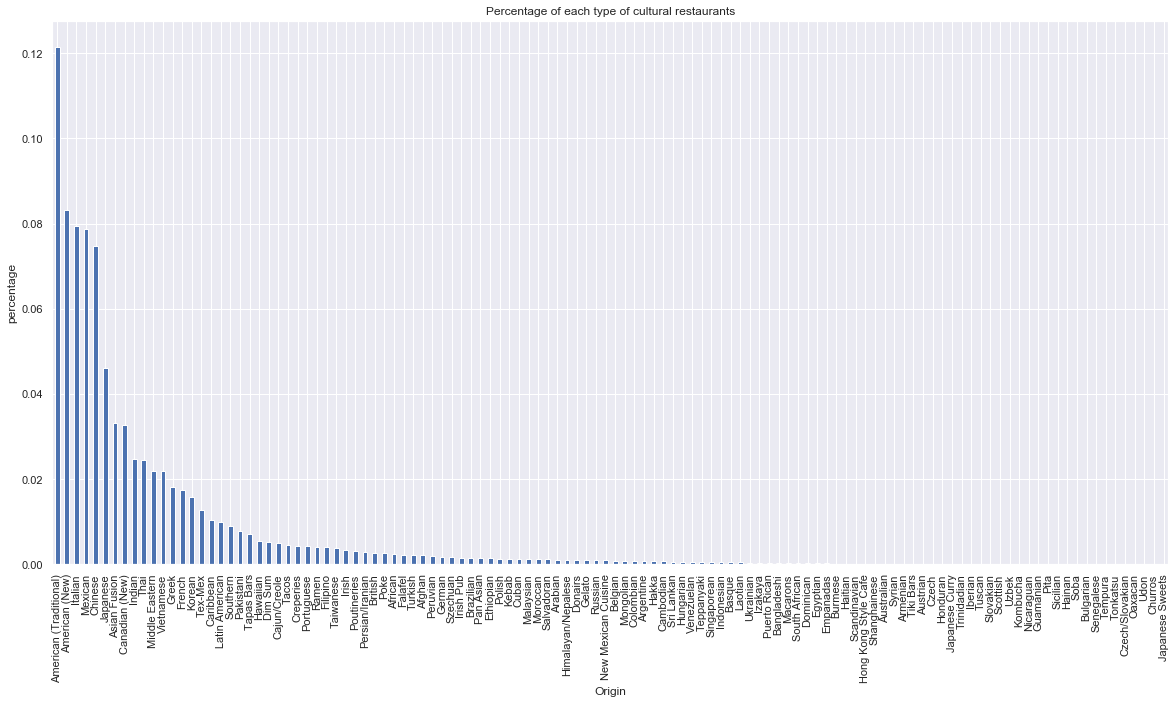

In [7]:
_=cat_mean_sorted.plot(kind='bar',
                figsize=(20, 10),
                title='Percentage of each type of cultural restaurants')
#_.set_xticklabels(xlabels,rotation=45)
_.set_xlabel("Origin")
_.set_ylabel("percentage")

From the chart above American food is the highest percentage which should be no surprise as these are restaurants mainly in Canada and America. Not all restaurants are tagged which is fine, many restaurants such as a deli would not be catering a specific cultural designation. Though Japanese is a high drop off after chinese, it is split into 9 different categories.

Text(0, 0.5, 'Count')

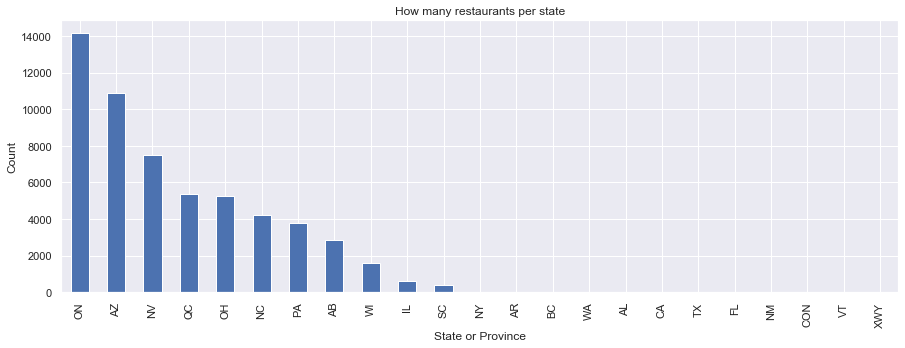

In [8]:
_=restaurantdf.state.value_counts().plot(kind='bar',
                figsize=(15, 5),
                title='How many restaurants per state')
_.set_xlabel("State or Province")
_.set_ylabel("Count")

In [9]:
#What? How is it that I am only getting this few states? Mostly from Ontario, Arizona, and Nevada it looks like
restaurantdf.state.value_counts()
#after some digging, it looks like it's inherent to the dataset that was provided by yelp which makes sense as Yelp probably wouldn't want to provide all their data publicly

ON     14145
AZ     10900
NV      7480
QC      5342
OH      5252
NC      4193
PA      3805
AB      2870
WI      1605
IL       626
SC       372
NY        11
AR         1
BC         1
WA         1
AL         1
CA         1
TX         1
FL         1
NM         1
CON        1
VT         1
XWY        1
Name: state, dtype: int64

In [10]:
restaurantdf.loc[restaurantdf['state']=='AZ'].city.value_counts()

Phoenix                 3787
Scottsdale              1491
Mesa                    1122
Tempe                    988
Chandler                 812
Glendale                 688
Gilbert                  557
Peoria                   359
Surprise                 217
Goodyear                 175
Avondale                 169
Cave Creek                87
Fountain Hills            81
Litchfield Park           45
Sun City                  45
Tolleson                  34
Laveen                    33
Carefree                  30
Paradise Valley           26
El Mirage                 25
Queen Creek               20
Buckeye                   14
Sun City West             13
Sun Lakes                 11
Youngtown                  9
Anthem                     6
Guadalupe                  6
Higley                     5
Apache Junction            4
Fort McDowell              4
Laveen Village             4
PHOENIX                    4
Ahwatukee                  4
Waddell                    2
Fort Mcdowell 

In [11]:
#as one of the largest cities, drilling into phoenix
restaurantdf.loc[restaurantdf['city']=='Phoenix']

,business_id,name,city,state,date,Afghan,African,American (New),American (Traditional),Arabian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,AZ,"2010-07-20 22:03:12, 2010-07-26 19:51:14, 2011...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,44YFU284Z3KDEy25QyVoUw,Nee House Chinese Restaurant,Phoenix,AZ,"2010-04-06 03:28:25, 2010-05-01 03:26:38, 2010...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,ysfeDcLAYk_MVzfBmyiSTg,Vals Getaway DES Cafeteria,Phoenix,AZ,"2013-06-21 19:33:23, 2014-03-12 22:42:46, 2014...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,Rs8Wi4OEjeOX7LVlzsXDOA,Sushi Mocorito,Phoenix,AZ,"2017-03-04 01:06:24, 2017-03-12 22:16:15, 2017...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,dUffgo9Lh_Vk9TLuFR5ywg,Oregano's Pizza Bistro,Phoenix,AZ,"2010-04-05 01:34:19, 2010-04-09 21:35:36, 2010...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56506,KJJwE2gZ1ByGN55cIHxdkA,Yogis Grill,Phoenix,AZ,"2018-09-29 21:32:54, 2018-10-08 00:15:34, 2018...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56534,CUn59grUqyROxhSyfjjhHw,Filiberto's Mexican Food,Phoenix,AZ,"2011-02-14 19:49:05, 2011-12-10 02:45:12, 2011...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56558,3xI0ToitrAJkrUSH4gbmCA,Subway,Phoenix,AZ,"2010-11-07 19:14:44, 2011-10-08 20:11:24, 2011...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56564,cILk7PnJBxNsMmGhQU2cyA,Lola's,Phoenix,AZ,"2014-03-30 15:03:14, 2014-04-01 19:39:41, 2014...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Information provided by the US Census bureau (https://www.census.gov/quickfacts/fact/table/phoenixcityarizona,AZ/PST045219)
AZdf=pd.read_csv('yelp_dataset/AZcensus.csv',encoding = "utf-8-sig")

In [13]:
AZdf

,Fact,"Phoenix city, Arizona",Arizona
0,"Population estimates, July 1, 2019, (V2019)",NaN,"7,278,717"
1,"Population estimates, July 1, 2018, (V2018)","1,660,272","7,171,646"
2,"Population estimates base, April 1, 2010, (V2...",NaN,"6,392,288"
3,"Population estimates base, April 1, 2010, (V2...","1,446,914","6,392,288"
4,"Population, percent change - April 1, 2010 (es...",NaN,13.90%
5,"Population, percent change - April 1, 2010 (es...",14.70%,12.20%
6,"Population, Census, April 1, 2010","1,445,632","6,392,017"
7,"Persons under 5 years, percent",7.40%,6.10%
8,"Persons under 18 years, percent",26.50%,22.90%
9,"Persons 65 years and over, percent",10.30%,17.50%


inputs -
categories: dummies
businessID: unique values
cities: categorical
state:categorical
checkin: array of datetime


Things I am looking for ultimately:

#scatter plot to describe cities with total restaurants on X and the percentage of restaurants with a foreign origin on the Y with each point being a city
I could do a regression line through the scatterplot to show how correlated restaurant diversity is to the number of overall restaurants.number of restaurants is effectively just a proxy for how urbanized and big a city is, so what this data means would be how much foreign culture as a percentage is accepted the bigger or smaller a city is.


In [ ]:
# x= # of restaurants
# y= percentage of foreign restaurants
# .=city
# |         /.  .
# |      ./
# | .  /.   .
# | ./ .
# |/._____________

In [5]:
cities=list(set(restaurantdf.city))
cities

['Grand River',
 'Las Vegas',
 'Venetia',
 'Oakdale',
 'Georgetown',
 'Cornelius',
 'Troy Township',
 'Monona',
 'Painesville Township',
 'Olmsted Falls',
 'Canonsburg',
 'Saint-Jerome',
 'New Tecumseth',
 'Elizabeth Township',
 'Cote Saint-Luc',
 'Don Mills',
 'Independence',
 'Willoughby Hills',
 'Spartanburg',
 'Blue Diamond',
 'Pheonix',
 'St-Jerome',
 'Richfield',
 'Mint  Hill',
 'South Park Township',
 'Stallings',
 'Indian Trail',
 'New Eagle',
 'Moreland Hills',
 'Old Port of Montreal',
 'Pepper Pike',
 'Champaign',
 'Brookline',
 'Apache Junction',
 'Central City',
 'River Drive Park',
 'Thornhill',
 'Belleville',
 'North Huntingdon',
 'Bridgeville',
 'Toronto',
 'Sainte-Marguerite-du-lac-Masson',
 'Cleveland Hghts.',
 'Sun Prairie',
 'Leetsdale',
 'East McKeesport',
 'Dollard-des Ormeaux',
 'Mount Lebanon',
 'Gifford',
 'Tremont',
 'Phx',
 'Montr\x81E¾\x81E\x81E½©al-Nord',
 'Spring Valley',
 'N Ridgeville',
 'Mesa AZ',
 'De Forest',
 'Shaler Township',
 "L'\x81E¾\x81E\x81E\x8

In [28]:
restaurantdf.loc[restaurantdf['city']=='Phoenix'].count()[0]

3787

In [10]:
list(restaurantdf.columns)

['business_id',
 'checkin',
 'name',
 'city',
 'state',
 'Afghan',
 'African',
 'American (New)',
 'American (Traditional)',
 'Arabian',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bangladeshi',
 'Basque',
 'Belgian',
 'Brazilian',
 'British',
 'Cajun/Creole',
 'Cambodian',
 'Canadian (New)',
 'Caribbean',
 'Chinese',
 'Creperies',
 'Cuban',
 'Dim Sum',
 'Donairs',
 'Ethiopian',
 'Falafel',
 'Filipino',
 'French',
 'Gelato',
 'German',
 'Greek',
 'Hakka',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Honduran',
 'Hong Kong Style Cafe',
 'Hungarian',
 'Indian',
 'Irish',
 'Irish Pub',
 'Italian',
 'Izakaya',
 'Japanese',
 'Kebab',
 'Korean',
 'Laotian',
 'Latin American',
 'Macarons',
 'Malaysian',
 'Mexican',
 'Middle Eastern',
 'Mongolian',
 'Moroccan',
 'New Mexican Cuisine',
 'Nicaraguan',
 'Pakistani',
 'Pan Asian',
 'Persian/Iranian',
 'Peruvian',
 'Poke',
 'Polish',
 'Portuguese',
 'Poutineries',
 'Puerto Rican',
 'Ramen',
 'Russian',
 'Salvadoran',
 'Scotti

In [30]:
#I need a way to check if any of the dummy variables are 1
#restaurantdf.loc[restaurantdf['city']=='Phoenix'].any()
#hmm, that just makes a series of each column

business_id     True
name            True
city            True
state           True
date            True
               ...  
Bulgarian      False
Soba           False
Hainan         False
Senegalese     False
Churros        False
Length: 122, dtype: bool

In [ ]:
# citiesdf=pd.DataFrame(columns=['city', 'restaurant_count', 'percentage_ethnic'])
# for city in cities:
#     #count the number of business_IDs in a city to use as a count of restaurants in a city
#     count = restaurantdf.loc[restaurantdf['city']==city].count()[0]
#     percentage= /count
#     citiesdf.append(city, count, percentage)

# citiesdf

In [51]:
restaurantdf=restaurantdf.fillna(0)

In [52]:
ethnic=restaurantdf.drop(columns=['business_id','checkin','name','city','state'])

In [53]:
def check_if_foreign_food(row):
    for i in list(row.keys()):
        if row[i] > 0: 
            return True
    return False

foreign=[]
for i, row in ethnic.iterrows():
    foreign.append(check_if_foreign_food(row))
restaurantdf['foreign']=foreign

#ethnic['foreign'] = ethnic.apply(lambda x: check_if_foreign_food(x))
#ethnic.head(10)

In [54]:
cityCount=restaurantdf.city.value_counts()

In [55]:
cityCountForeign=restaurantdf.loc[restaurantdf['foreign']==True].city.value_counts()

In [56]:
citiesdf = pd.DataFrame()
citiesdf['restaurants']=cityCount

In [57]:
citiesdf=citiesdf.join(cityCountForeign)

In [58]:
citiesdf.columns=['restaurants','foreignRestaurants']

In [59]:
citiesdf['percentageForeign']=citiesdf.apply(lambda row: row['foreignRestaurants']/row['restaurants'],axis=1)
citiesdf=citiesdf.fillna(0)
citiesdf

,restaurants,foreignRestaurants,percentageForeign
Toronto,7594,5105.0,0.672241
Las Vegas,6201,4150.0,0.669247
Phoenix,3787,2403.0,0.634539
MontrE¾EE½©al,3625,2320.0,0.640000
Calgary,2764,1757.0,0.635673
...,...,...,...
East McKeesport,1,1.0,1.000000
Lawrence,1,1.0,1.000000
Central,1,1.0,1.000000
Saint-Sauveur-des-Monts,1,0.0,0.000000


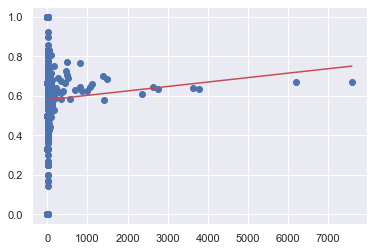

In [60]:
from scipy import stats
x=citiesdf.restaurants
y=citiesdf.percentageForeign
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [39]:
print(r_value, intercept, gradient)

0.029430026927217773 0.5798580875141308 2.2443400407311056e-05


In [40]:
#80% percent of towns have 27 or less restaurants
np.percentile(citiesdf.restaurants, 80)

27.0

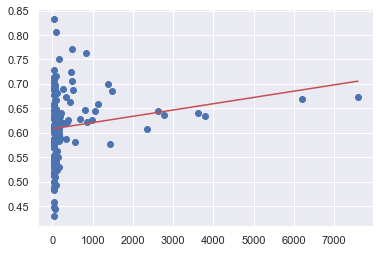

In [41]:
#let's take a look at how just large restaurant cities(cities that have >27 restaurants on yelp) would affect the data
bigCities=citiesdf[citiesdf.restaurants > 27]
x=bigCities.restaurants
y=bigCities.percentageForeign
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [42]:
print(r_value, intercept, gradient)

0.17880100760261367 0.6078739374634974 1.2861026257128332e-05


a lot of towns had only a singular restaurant which was making r-squared value incredibly low meaning the datapoints don't relate to the regression well. With just taking the top 20% of cities, the r-value became 17.8% which is still relatively low, but shows that it's not an irrelevant link.

#have a drill in plot to a state and city
#take the census data, map certain categories to racial origin and have a bar chart of what percentage of the restaurant origins represented are over or under the percentage
What this would represent is how much more or less represented a culture is compared to the population, high values would mean restaurants of that category have high influence. Unfortunately, US census only asks for a few ethnic categories(White, Black or African American, American Indian and Alaska Native, Asian, Native Hawaiian and Other Pacific Islander, and Hispanic or Latino) which are very broad. This can only get a region's influence on the city/state instead of more specific, but it would be insightful. Would need to bucket yelp categories into census ethnic origin.



In [ ]:
# x=different racial origin (e.g. Asian, hispanic)
# y=diff between percentage of foreign restaurants and the racial origin 
# |
# |
# |   __
# |   | |
# |___|_|_______
# |        |_|
# |        
# |
# |

In [5]:
ethnic=restaurantdf.drop(columns=['business_id','checkin','name','city','state'])
ethnic.head(5)

,Afghan,African,American (New),American (Traditional),Arabian,Argentine,Armenian,Asian Fusion,Australian,Austrian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Find relationship between named categories and the racial demographic. X=# of each demographic(white, latino, asian), Random forest
feed features( x variable ->categories)
Y=#of restaurants 


work with dummies - groupby first and sum the categories

In [14]:
#what is a random forest...
#first things first, group the categories by racial demographic.
racial=['White', 'Black', 'American Indian', 'Asian', 'Pacific Islander', 'Hispanic']
categoryList=list(categories.columns)
categoryList.remove(categoryList[0])
categoryList

['Afghan',
 'African',
 'American (New)',
 'American (Traditional)',
 'Arabian',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bangladeshi',
 'Basque',
 'Belgian',
 'Brazilian',
 'British',
 'Cajun/Creole',
 'Cambodian',
 'Canadian (New)',
 'Caribbean',
 'Chinese',
 'Creperies',
 'Cuban',
 'Dim Sum',
 'Donairs',
 'Ethiopian',
 'Falafel',
 'Filipino',
 'French',
 'Gelato',
 'German',
 'Greek',
 'Hakka',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Honduran',
 'Hong Kong Style Cafe',
 'Hungarian',
 'Indian',
 'Irish',
 'Irish Pub',
 'Italian',
 'Izakaya',
 'Japanese',
 'Kebab',
 'Korean',
 'Laotian',
 'Latin American',
 'Macarons',
 'Malaysian',
 'Mexican',
 'Middle Eastern',
 'Mongolian',
 'Moroccan',
 'New Mexican Cuisine',
 'Nicaraguan',
 'Pakistani',
 'Pan Asian',
 'Persian/Iranian',
 'Peruvian',
 'Poke',
 'Polish',
 'Portuguese',
 'Poutineries',
 'Puerto Rican',
 'Ramen',
 'Russian',
 'Salvadoran',
 'Scottish',
 'South African',
 'Southern',
 'Sri Lankan',
 'Syr

In [15]:
#eugh, I have to do this manually?
#bucket the categories of restaurants by race as defined from US census bureau
categoriesByRace={racial[0]: ['American (New)','American (Traditional)','Armenian', 'Australian', 'Austrian', 'Basque', 'Belgian', 'British', 'Canadian (New)', 'Creperies', 'Donairs', 'Falafel', 'French', 'Gelato', 'German','Greek', 'Hungarian', 'Irish', 'Irish Pub', 'Italian', 'Macarons', 'Polish', 'Portuguese', 'Poutineries', 'Russian', 'Scottish', 'Ukrainian', 'Sicilian', 'Tuscan', 'Uzbek', 'Czech', 'Czech/Slovakian', 'Scandinavian', 'Slovakian', 'Iberian', 'Bulgarian'],
                  racial[1]: ['African','Afghan', 'Ethiopian','Kebab', 'Middle Eastern', 'Moroccan', 'Pakistani', 'Persian/Iranian', 'South African', 'Southern','Syrian', 'Trinidadian','Turkish', 'Egyptian', 'Haitian', 'Pita', 'Senegalese'],
                  racial[2]: ['Cajun/Creole', 'Caribbean'],
                  racial[3]: ['Asian Fusion', 'Bangladeshi', 'Cambodian','Chinese', 'Dim Sum', 'Himalayan/Nepalese', 'Hong Kong Style Cafe', 'Indian', 'Izakaya','Japanese','Korean', 'Laotian', 'Mongolian', 'Pan Asian', 'Ramen', 'Szechuan', 'Taiwanese','Thai', 'Vietnamese','Burmese', 'Japanese Sweets', 'Shanghainese', 'Singaporean','Teppanyaki', 'Kombucha', 'Japanese Curry', 'Udon', 'Tempura', 'Tonkatsu', 'Soba', 'Hainan'],
                  racial[4]: ['Filipino', 'Hakka', 'Hawaiian', 'Malaysian','Poke','Sri Lankan','Tiki Bars', 'Indonesian', 'Guamanian'],
                  racial[5]: ['Argentine', 'Brazilian', 'Cuban', 'Honduran', 'Latin American', 'Mexican', 'New Mexican Cuisine', 'Nicaraguan', 'Peruvian', 'Puerto Rican', 'Salvadoran', 'Tacos','Tapas Bars', 'Tex-Mex', 'Venezuelan', 'Colombian', 'Dominican', 'Empanadas', 'Oaxacan', 'Churros'],
                 }

In [16]:
restaurantdf.groupby('city').business_id.count()

city
AGINCOURT                    1
Agincourt                    1
Ahwatukee                    4
Airdrie                     67
Ajax                       158
                          ... 
solon                        1
south Euclid                 1
springdale                   1
verdun                       1
E¾EEEEe-des-Soeurs      1
Name: business_id, Length: 763, dtype: int64

In [17]:
restaurantdf.head()

,business_id,checkin,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
0,QXAEGFB4oINsVuTFxEYKFQ,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 201...",Emerald Chinese Restaurant,Mississauga,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,gnKjwL_1w79qoiV3IC_xQQ,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 201...",Musashi Japanese Restaurant,Charlotte,NC,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1Dfx3zM-rW4n-31KeC8sJg,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Taco Bell,Phoenix,AZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fweCYi8FmbJXHCqLnwuk8w,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 201...",Marco's Pizza,Mentor-on-the-Lake,OH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PZ-LZzSlhSe9utkQYU8pFg,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 201...",Carluccio's Tivoli Gardens,Las Vegas,NV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from collections import Counter

In [19]:
def check_which_racial(row):
    racialType=[]
    for i in list(row.keys()):
        if row[i] >0:
            #if row.keys()[i] in categoriesByRace.values():
            for key in list(categoriesByRace.keys()):
                if i in categoriesByRace[key]:
                    racialType.append(key)
    if len(racialType)==0:
        return None
    return Counter(racialType).most_common(1)[0][0]

#for each row of each category, make a list where the categories are a 1 and convert those, same size as this dataframe


In [20]:
racialTypes = ethnic.apply(lambda x: check_which_racial(x),axis=1)

In [21]:
racialTypes.head()

0       Asian
1       Asian
2    Hispanic
3       White
4       White
dtype: object

In [22]:
racialTypes.value_counts()

White               17951
Asian               10730
Hispanic             4867
Black                1700
American Indian       665
Pacific Islander      468
dtype: int64

In [23]:
restaurantdf['racial']=racialTypes
restaurantdf.head(10)

,business_id,checkin,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,...,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros,racial
0,QXAEGFB4oINsVuTFxEYKFQ,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 201...",Emerald Chinese Restaurant,Mississauga,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asian
1,gnKjwL_1w79qoiV3IC_xQQ,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 201...",Musashi Japanese Restaurant,Charlotte,NC,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asian
2,1Dfx3zM-rW4n-31KeC8sJg,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Taco Bell,Phoenix,AZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hispanic
3,fweCYi8FmbJXHCqLnwuk8w,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 201...",Marco's Pizza,Mentor-on-the-Lake,OH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White
4,PZ-LZzSlhSe9utkQYU8pFg,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 201...",Carluccio's Tivoli Gardens,Las Vegas,NV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White
5,1RHY4K3BD22FK7Cfftn8Mg,"[2017-10-08 16:47:41, 2018-01-03 13:53:39, 201...",Marathon Diner,Pittsburgh,PA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
6,tstimHoMcYbkSC4eBA1wEg,"[2010-06-26 20:40:58, 2010-10-31 19:06:32, 201...",Maria's Mexican Restaurant & Bakery,Las Vegas,NV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hispanic
7,NDuUMJfrWk52RA-H-OtrpA,"[2013-12-01 00:12:10, 2013-12-03 23:01:24, 201...",Bolt Fresh Bar,Toronto,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
8,SP_YXIEwkFPPl_9anCYmpQ,"[2013-07-20 22:24:11, 2013-08-01 18:34:15, 201...",The Steady Cafe & Bar,Toronto,ON,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Black
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[2010-08-08 17:57:52, 2010-10-06 12:18:22]",Manzetti's Tavern,Charlotte,NC,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,White


In [41]:
#Some example data to display
# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)

In [32]:
# from scipy import stats
# x=citiesdf.restaurants
# y=citiesdf.percentageForeign
# gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# mn=np.min(x)
# mx=np.max(x)
# x1=np.linspace(mn,mx,500)
# y1=gradient*x1+intercept
# plt.plot(x,y,'ob')
# plt.plot(x1,y1,'-r')
# plt.show()

In [24]:
cityCount=restaurantdf.city.value_counts()
x= cityCount
x

Toronto             7594
Las Vegas           6201
Phoenix             3787
MontrE¾EE½©al    3625
Calgary             2764
                    ... 
Maricopa               1
Sauk City              1
Brunswick Hills        1
Varennes               1
kirtland               1
Name: city, Length: 763, dtype: int64

In [25]:
for key in list(categoriesByRace.keys()):
    print(key)

White
Black
American Indian
Asian
Pacific Islander
Hispanic


In [26]:
restaurantdf[restaurantdf.racial=='White'].city.value_counts()

Toronto                  2068
Las Vegas                1839
Phoenix                  1139
MontrE¾EE½©al         1131
Charlotte                 899
                         ... 
Blainville                  1
Sainte-Therese              1
Port Credit                 1
Saint-Basile-Le-Grand       1
Halton Hills                1
Name: city, Length: 562, dtype: int64

In [21]:
#Y should be the amount of each racial type by city
y_racial={}
for key in list(categoriesByRace.keys()):
    y_racial[key]=restaurantdf[restaurantdf.racial==key].city.value_counts()


In [22]:
x_racial={}
for key in list(categoriesByRace.keys()):
    if key not in x_racial.keys():
        x_racial[key]=[]
    for city in y_racial[key].index:
        x_racial[key].append(x[city])

In [23]:
x_racial['White']

[7594,
 6201,
 3787,
 3625,
 2631,
 2353,
 2764,
 1491,
 1421,
 1061,
 1394,
 1122,
 852,
 988,
 812,
 688,
 557,
 454,
 336,
 516,
 359,
 274,
 826,
 393,
 292,
 446,
 480,
 490,
 217,
 336,
 173,
 179,
 203,
 178,
 175,
 186,
 174,
 129,
 176,
 146,
 158,
 148,
 125,
 88,
 105,
 158,
 122,
 168,
 91,
 107,
 107,
 119,
 114,
 107,
 87,
 110,
 101,
 158,
 81,
 115,
 169,
 156,
 72,
 75,
 72,
 127,
 56,
 62,
 60,
 116,
 78,
 68,
 48,
 64,
 53,
 57,
 67,
 68,
 79,
 78,
 64,
 65,
 81,
 81,
 46,
 48,
 57,
 51,
 63,
 48,
 58,
 65,
 57,
 39,
 41,
 53,
 64,
 30,
 46,
 54,
 45,
 46,
 48,
 48,
 60,
 26,
 37,
 38,
 50,
 67,
 46,
 42,
 36,
 48,
 52,
 35,
 47,
 49,
 38,
 36,
 35,
 35,
 48,
 38,
 33,
 33,
 49,
 38,
 44,
 28,
 21,
 29,
 45,
 50,
 22,
 45,
 40,
 28,
 29,
 27,
 26,
 27,
 29,
 38,
 19,
 23,
 54,
 25,
 27,
 31,
 33,
 28,
 32,
 23,
 34,
 26,
 18,
 25,
 23,
 49,
 22,
 28,
 23,
 26,
 14,
 33,
 20,
 23,
 15,
 18,
 31,
 28,
 18,
 22,
 18,
 25,
 16,
 24,
 14,
 12,
 15,
 22,
 12,
 11,
 20,
 16

In [24]:
y_racial['White']

Toronto                      2068
Las Vegas                    1839
Phoenix                      1139
MontrE¾EE½©al             1131
Charlotte                     899
                             ... 
Beeton                          1
Sainte-Marguerite-Esterel       1
Upper Saint Clair               1
McAdenville                     1
Nellis Air Force Base           1
Name: city, Length: 562, dtype: int64

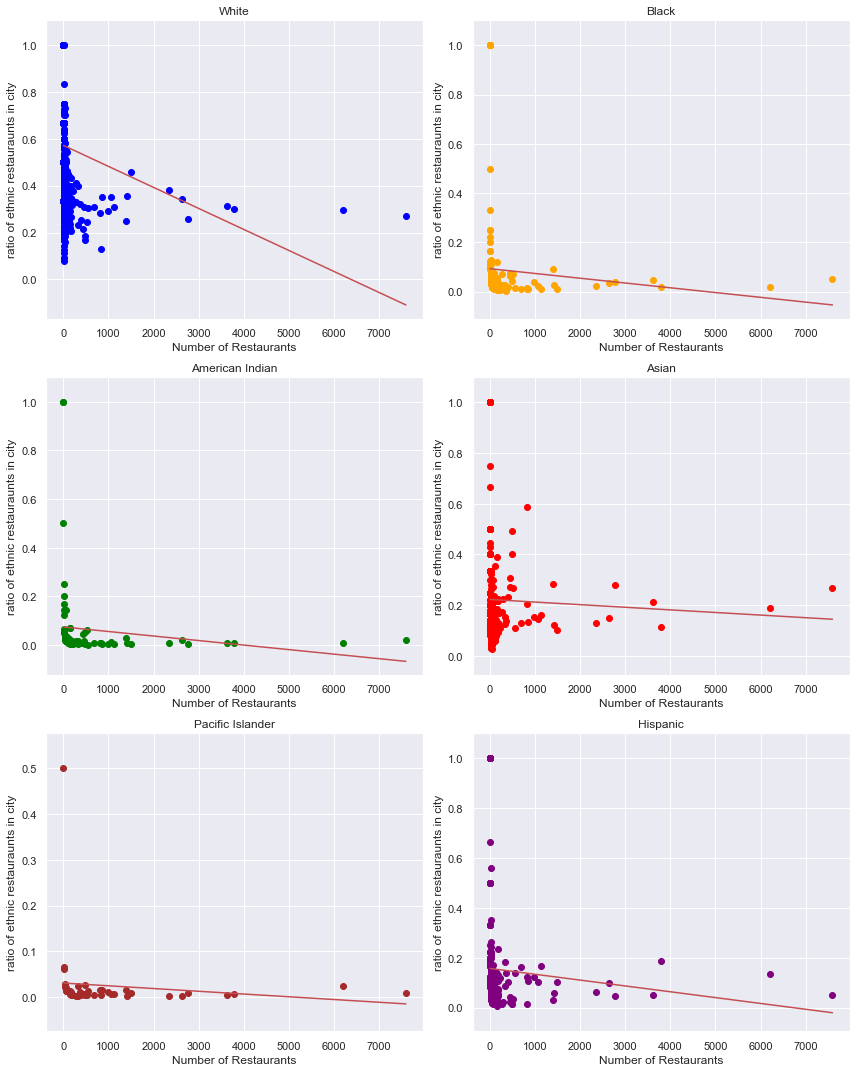

In [25]:
from scipy import stats

fig, axs = plt.subplots(3, 2)
axs[0, 0].scatter(x_racial['White'], y_racial['White']/x_racial['White'],color='blue')
axs[0, 0].set_title('White')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['White'],y_racial['White']/x_racial['White'])
mn=np.min(x_racial['White'])
mx=np.max(x_racial['White'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[0, 0].plot(x1,y1,'-r')

axs[0, 1].scatter(x_racial['Black'], y_racial['Black']/x_racial['Black'], color='orange')
axs[0, 1].set_title('Black')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Black'],y_racial['Black']/x_racial['Black'])
mn=np.min(x_racial['Black'])
mx=np.max(x_racial['Black'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[0, 1].plot(x1,y1,'-r')

axs[1, 0].scatter(x_racial['American Indian'], y_racial['American Indian']/x_racial['American Indian'], color='green')
axs[1, 0].set_title('American Indian')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['American Indian'],y_racial['American Indian']/x_racial['American Indian'])
mn=np.min(x_racial['American Indian'])
mx=np.max(x_racial['American Indian'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[1, 0].plot(x1,y1,'-r')

axs[1, 1].scatter(x_racial['Asian'], y_racial['Asian']/x_racial['Asian'], color='red')
axs[1, 1].set_title('Asian')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Asian'],y_racial['Asian']/x_racial['Asian'])
mn=np.min(x_racial['Asian'])
mx=np.max(x_racial['Asian'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[1, 1].plot(x1,y1,'-r')

axs[2, 0].scatter(x_racial['Pacific Islander'], y_racial['Pacific Islander']/x_racial['Pacific Islander'], color='brown')
axs[2, 0].set_title('Pacific Islander')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Pacific Islander'],y_racial['Pacific Islander']/x_racial['Pacific Islander'])
mn=np.min(x_racial['Asian'])
mx=np.max(x_racial['Asian'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[2, 0].plot(x1,y1,'-r')

axs[2, 1].scatter(x_racial['Hispanic'], y_racial['Hispanic']/x_racial['Hispanic'], color='purple')
axs[2, 1].set_title('Hispanic')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x_racial['Hispanic'],y_racial['Hispanic']/x_racial['Hispanic'])
mn=np.min(x_racial['Hispanic'])
mx=np.max(x_racial['Hispanic'])
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
axs[2, 1].plot(x1,y1,'-r')


for ax in axs.flat:
    ax.set(xlabel='Number of Restaurants',ylabel='ratio of ethnic restauraunts in city')

fig.set_figheight(15)
fig.set_figwidth(12)
fig.tight_layout()    

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [ ]:
#ratio vs demographic composition of the city.

For the last plot think I think is necessary to tell a good data story is to use the checkin data to see how much the categories change over time.
Y=# of checkins
x=time
each line would be one of the top n categories

In [27]:
#I need to massage the data into format such as below
#    date(year-month)  city        Checkins(w)  Checkins(b) Checkins(a) Checkins(h) Checkins(na) Checkins(pi)
# 0  2010-7            Mississauga  3            5                 3    6                2        1
# 1  2010-8            
# 2
# 3
# 4


In [27]:
from datetime import datetime

In [28]:
date_range=pd.date_range('2010-01', '2019-12')
date_checkin=pd.DataFrame(index=date_range,columns=categoriesByRace.keys())
#wait, how do I split by city
# date_checkin.loc['2010-01-04'].White
# date_checkin.loc['2010-01-04']
date_checkin=date_checkin.fillna(0)
date_checkin

,White,Black,American Indian,Asian,Pacific Islander,Hispanic
2010-01-01,0,0,0,0,0,0
2010-01-02,0,0,0,0,0,0
2010-01-03,0,0,0,0,0,0
2010-01-04,0,0,0,0,0,0
2010-01-05,0,0,0,0,0,0
...,...,...,...,...,...,...
2019-11-27,0,0,0,0,0,0
2019-11-28,0,0,0,0,0,0
2019-11-29,0,0,0,0,0,0
2019-11-30,0,0,0,0,0,0


In [29]:
date_checkin.loc['2010-01-04']['White']

0

In [30]:
#checkin=restaurantdf.iloc[:,0:4]
#checkin['racial']=restaurantdf.racial
checkin=restaurantdf[['checkin','city','racial']]
checkin_test=checkin.head(5)
checkin

,checkin,city,racial
0,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 201...",Mississauga,Asian
1,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 201...",Charlotte,Asian
2,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Phoenix,Hispanic
3,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 201...",Mentor-on-the-Lake,White
4,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 201...",Las Vegas,White
...,...,...,...
56607,"[2014-05-14 18:04:07, 2014-06-23 14:58:40, 201...",Brampton,Asian
56608,"[2016-04-18 01:45:13, 2016-04-18 16:13:30, 201...",Toronto,Asian
56609,"[2010-08-21 19:44:39, 2010-08-22 23:48:43, 201...",Fairlawn,White
56610,"[2012-11-26 17:32:46, 2014-08-26 23:59:43, 201...",MontrE¾EE½©al,Asian


In [30]:
#checkin_test.checkin.apply(lambda x: x.date())
#can't apply since it is a list of datetimes not each one being a date time

for i, row in checkin_test.iterrows():
    row_date=pd.to_datetime(row.checkin)
#     row_date=[]
#     for date in row.checkin:
#         row_date.append(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date())
#     print(row_date)
    for date in list(row_date.date):
            date_checkin.loc[date][row.racial]+=1

In [31]:
date_checkin[date_checkin.Asian>0]

,White,Black,American Indian,Asian,Pacific Islander,Hispanic
2010-07-05,0,0,0,1,0,0
2010-11-13,0,0,0,1,0,0
2010-12-19,0,0,0,1,0,0
2010-12-21,0,0,0,1,0,0
2010-12-26,0,0,0,1,0,0
...,...,...,...,...,...,...
2018-10-23,0,0,0,1,0,0
2018-10-24,0,0,0,1,0,0
2018-10-26,0,0,0,1,0,0
2018-11-09,0,0,0,1,0,0


In [32]:
def add_to_timeseries(data,timeseries):
    for i, row in data.iterrows():
        row_date=pd.to_datetime(row.checkin)
        for date in list(row_date.date):
            try:
                timeseries.loc[date][row.racial]+=1
            except:
                pass

In [33]:
#Chunk dataframe into one that's smaller
n = 5000  #chunk row size
checkin_chunk_df = [checkin[i:i+n] for i in range(0,checkin.shape[0],n)]

In [34]:
for chunk_index,chunk in enumerate(checkin_chunk_df):
    add_to_timeseries(checkin_chunk_df[chunk_index],date_checkin)

In [35]:
#Export to CSV so I don't have to always keep manipulating the JSON to get the dataframe
date_checkin.to_csv('yelp_dataset/date_checkin.csv',index=None,header=True, encoding="utf-8-sig") 

In [36]:
date_checkin[date_checkin.Asian>0]

,White,Black,American Indian,Asian,Pacific Islander,Hispanic
2010-01-16,44,0,0,12,0,7
2010-01-17,54,3,1,17,0,5
2010-01-18,26,0,1,13,0,12
2010-01-19,29,1,0,13,0,8
2010-01-20,36,1,1,8,0,4
...,...,...,...,...,...,...
2018-11-11,1964,64,34,1101,59,461
2018-11-12,1067,35,20,786,41,303
2018-11-13,737,32,21,565,27,260
2018-11-14,784,42,14,519,36,268


In [47]:
monthly_checkin = date_checkin.resample('M').sum()
monthly_checkin

,White,Black,American Indian,Asian,Pacific Islander,Hispanic
2010-01-31,777,19,13,249,3,153
2010-02-28,1531,58,39,550,18,337
2010-03-31,2485,103,42,872,32,571
2010-04-30,2779,79,40,927,44,558
2010-05-31,3077,82,55,984,57,633
...,...,...,...,...,...,...
2019-08-31,0,0,0,0,0,0
2019-09-30,0,0,0,0,0,0
2019-10-31,0,0,0,0,0,0
2019-11-30,0,0,0,0,0,0


In [48]:
monthly_checkin.index

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

Text(0, 0.5, 'Checkins')

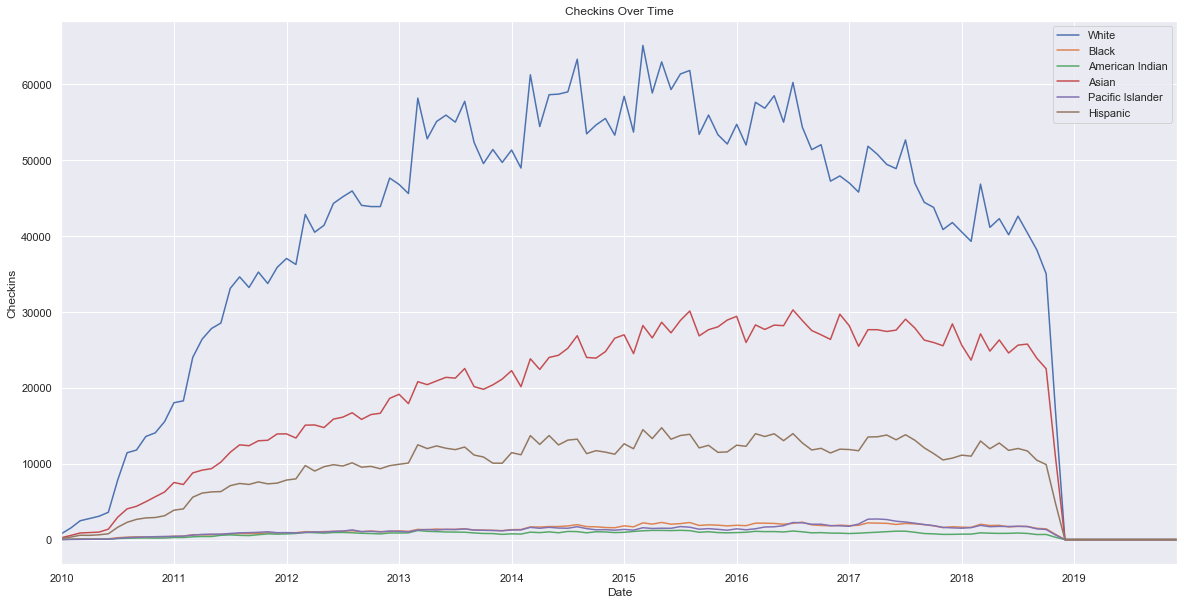

In [67]:
_=monthly_checkin.plot(figsize=(20, 10), title='Checkins Over Time')
_.set_xlabel("Date")
_.set_ylabel("Checkins")
# x=monthly_checkin.index
# y1=monthly_checkin.White
# plt.plot(x,y1)
# y2=monthly_checkin.Black
# plt.plot(x,y2)
# y3=monthly_checkin['American Indian']
# plt.plot(x,y3)
# y4=monthly_checkin.Asian
# plt.plot(x,y4)
# y5=monthly_checkin['Pacific Islander']
# plt.plot(x,y5)
# y6=monthly_checkin.Hispanic
# plt.plot(x,y6)

   From the dataset, all of the racial categories kept gaining checkins to 2013 and 2014 where they plateaued. The dataset is composed of checkins from restaurants throughout Canada and the USA, the racial types are those that are defined by the US census beareau. The US census bureau does not check for ethnicity(Greek, Cambodian, Mexican, ect.) but racial types(White, black, Asian, ect.) so restaurants of different ethnicities were bucketed into the coresponding racial type. Checkins to a "white" restaurant is the effect of domestic culture as the dataset is from US and Canada with a predominantly white population.
   
   From 2010 to mid 2013 checkins for restaurants of all racial types rose before mainly plateauing off. This raise in checkins is likely due to Yelp's growth as a platform as it grows for all racial types of restaurants in this period. Less people went to restaurants that are coded to white ethnicities in the middle of 2015 yet the amount of restaurant goers to asian, hispanic, and other restaurant types stayed relatively constant. Though white restaurants lost restaurant goers overall, the other restaurant types did not absorb the loss in cultural sway. This indicates that the cultural influence of foreign cultures is relatively stable, but domestic influence is lowering.